In [ ]:
pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4150 sha256=ca8fd448c24fe7081d31b46639c19ebf7ffaad9884f01d3438fc849f3c2b4287
  Stored in directory: /root/.cache/pip/wheels/04/38/f5/dc4f85c3909051823df49901e72015d2d750bd26b086480ec2
Successfully built torchviz


In [ ]:
import os
import argparse
import pandas as pd
from PIL import Image
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import torchviz as viz

In [ ]:

class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = {}
        idx = 0
        for img in os.listdir(img_dir):
            ID, label = str.split(img, '_')
            self.img_labels[idx] = (ID, label)
            idx += 1

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = f"{self.img_labels[idx][0]}_{self.img_labels[idx][1]}"
        name = f"{self.img_labels[idx][0]}"
        img_path = os.path.join(self.img_dir, img_path)
        image = Image.open(img_path)

        label = self.img_labels[idx][1][0]
        if self.transform:
            image = self.transform(image)
        return image, label, name


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, padding=2),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2))

        self.fc = nn.Linear(256 * 256 * 2, 2)
        self.dropout = nn.Dropout(p=0.5)
        self.logsoftmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.dropout(out)
        out = self.fc(out)
        return self.logsoftmax(out)

In [ ]:
def visualize(model_path="cnn_256_3layers.pkl"):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    cnn = CNN()
    cnn.load_state_dict(torch.load(model_path, map_location=device))
    cnn = cnn.to(device)
    x = torch.zeros(1, 3, 512, 512, dtype=torch.float, requires_grad = False).to(device)
    outputs = cnn(x)
    viz.make_dot(outputs, params=dict(cnn.named_parameters()), show_attrs=True, show_saved=True).render("cnn_architecture", format="png")

In [ ]:
pip install hiddenlayer

In [ ]:
import hiddenlayer as hl

In [ ]:
def visualize2(model_path="cnn_512_3layers.pkl"):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    cnn = CNN()
    cnn.load_state_dict(torch.load(model_path, map_location=device))
    cnn = cnn.to(device)
    transforms = [ hl.transforms.Prune('Constant') ] # Removes Constant nodes from graph.
    x = torch.zeros(1, 3, 512, 512, dtype=torch.float, requires_grad = False).to(device)
    graph = hl.build_graph(cnn, x)
    graph.theme = hl.graph.THEMES['blue'].copy()
    graph.save('rnn_hiddenlayer', format='png')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

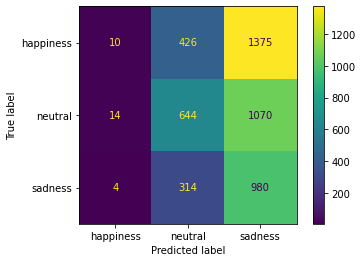

In [ ]:
df_test = pd.read_csv('testEmotions.csv')
df_pred = pd.read_csv('predictions.csv')
y_true = list(df_test['emotion'])
y_pred = list(df_pred['predicted'])
ConfusionMatrixDisplay.from_predictions(y_true,y_pred)


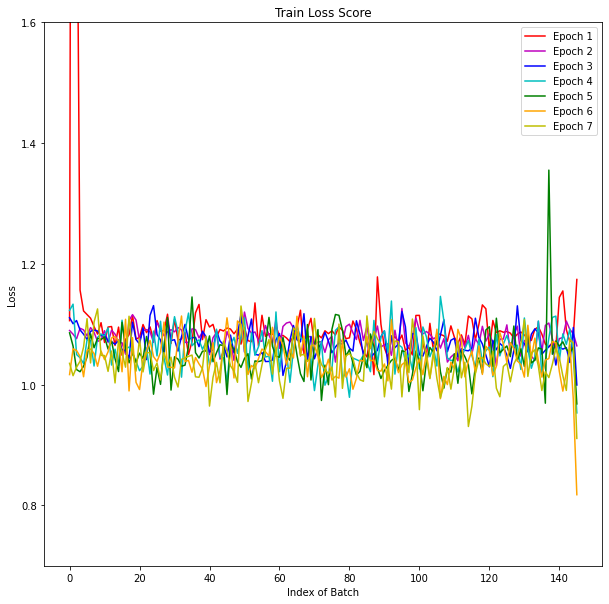

In [ ]:
df = pd.read_csv('train_loss_dict.csv', header=None, index_col=0)
plt.figure(figsize=(10, 10))
xn = 146
ticks = [0, xn, 2*xn, 3*xn, 4*xn, 5*xn, 6*xn, 7*xn]
plt.plot(np.arange(0,xn), df.loc[0],'-r', label="Epoch 1")
plt.plot(np.arange(0,xn), df.loc[1], '-m', label="Epoch 2")
plt.plot(np.arange(0,xn), df.loc[2], '-b', label="Epoch 3")
plt.plot(np.arange(0,xn), df.loc[3], '-c', label="Epoch 4")
plt.plot(np.arange(0,xn), df.loc[4], '-g', label="Epoch 5")
plt.plot(np.arange(0,xn), df.loc[5], 'orange', label="Epoch 6")
plt.plot(np.arange(0,xn), df.loc[6], '-y', label="Epoch 7")
plt.title('Train Loss Score')
plt.ylabel('Loss')
plt.xlabel('Index of Batch')
plt.legend(loc='upper right')
plt.ylim(0.7,1.6)
# plt.xticks(ticks, np.arange(0,8))
plt.show()

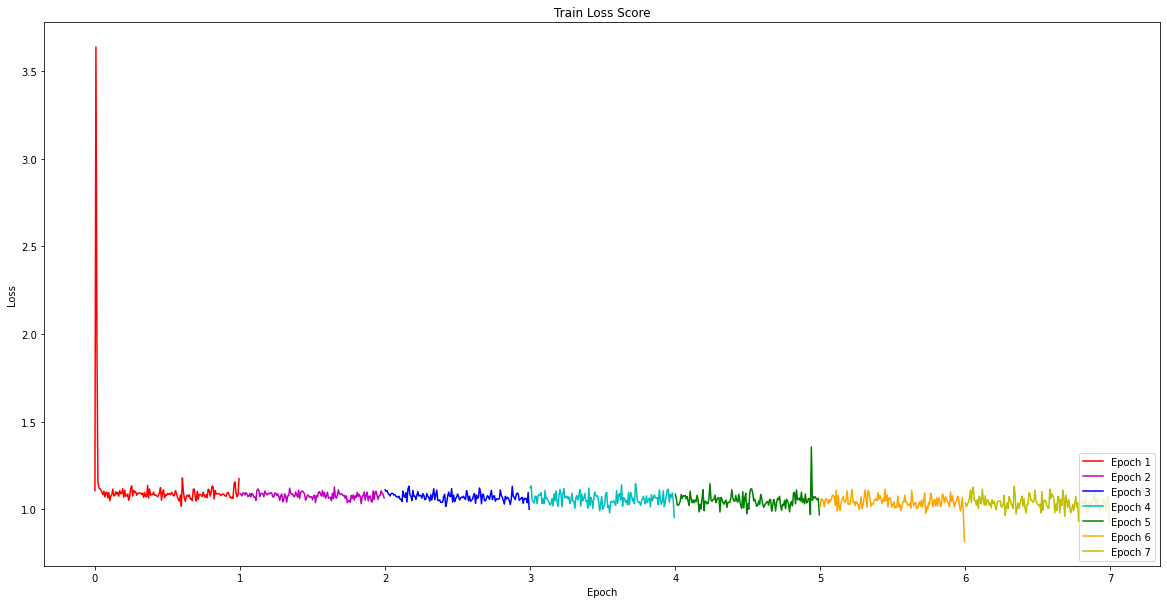

In [ ]:
df = pd.read_csv('train_loss_dict.csv', header=None, index_col=0)
plt.figure(figsize=(20, 10))
xn = 146
ticks = [0, xn, 2*xn, 3*xn, 4*xn, 5*xn, 6*xn, 7*xn]
plt.plot(np.arange(0,xn), df.loc[0],'-r', label="Epoch 1")
plt.plot(np.arange(xn,2*xn), df.loc[1], '-m', label="Epoch 2")
plt.plot(np.arange(2*xn,3*xn), df.loc[2], '-b', label="Epoch 3")
plt.plot(np.arange(3*xn,4*xn), df.loc[3], '-c', label="Epoch 4")
plt.plot(np.arange(4*xn,5*xn), df.loc[4], '-g', label="Epoch 5")
plt.plot(np.arange(5*xn,6*xn), df.loc[5], 'orange', label="Epoch 6")
plt.plot(np.arange(6*xn,7*xn), df.loc[6], '-y', label="Epoch 7")
plt.title('Train Loss Score')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.xticks(ticks, np.arange(0,8))
plt.show()

In [ ]:
df = pd.read_csv('ROC_test_list.csv', header=None)

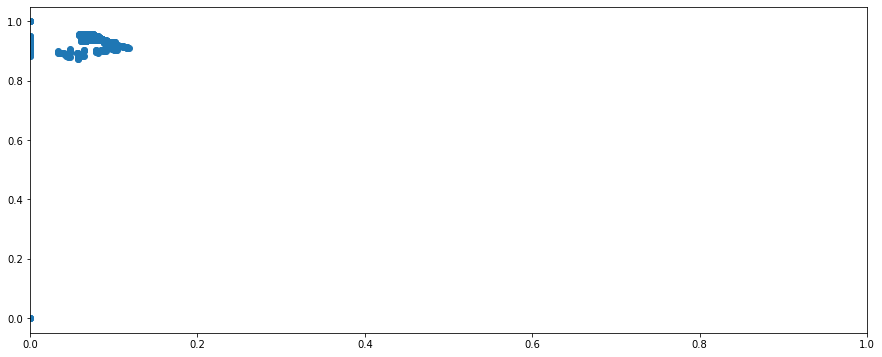

In [ ]:
plt.figure(figsize=(15, 6))
plt.xlim(0,1)
plt.scatter(df[1], df[0])
plt.show()